## ANÁLISE DE DADOS DATASET "WHINE QUALITY"

# 1. IMPORTANDO BIBLIOTECAS

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
import pandas as pd
import math
from scipy.stats import skew
from tabulate import tabulate

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 2. TRATANDO OS DADOS

In [ ]:
# Verify the contents of the directory
!ls "/content/drive/MyDrive/Homework/"

# Load the datasets
dt_whine_red = pd.read_csv("/content/drive/MyDrive/Homework/winequality-red.csv", sep=";")

Homework_1.ipynb  winequality-red.csv  winequality-white.csv


In [ ]:
dt_whine_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   object 
 11  quality               1599 non-null   int64  
dtypes: float64(10), int64(1), object(1)
memory usage: 150.0+ KB


In [ ]:
# CONFERINDO INCONSISTÊNCIA ENTRE OS VALORES PARA PADRONIZAR OS TIPOS
# Observe que alguns valores estranhos e por isso a coluna está como Object
dt_whine_red['alcohol'].unique()

array(['9.4', '9.8', '10', '9.5', '10.5', '9.2', '9.9', '9.1', '9.3', '9',
       '9.7', '10.1', '10.6', '9.6', '10.8', '10.3', '13.1', '10.2',
       '10.9', '10.7', '12.9', '10.4', '13', '14', '11.5', '11.4', '12.4',
       '11', '12.2', '12.8', '12.6', '12.5', '11.7', '11.3', '12.3', '12',
       '11.9', '11.8', '8.7', '13.3', '11.2', '11.6', '11.1', '13.4',
       '12.1', '8.4', '12.7', '14.9', '13.2', '13.6', '13.5',
       '100.333.333.333.333', '9.55', '8.5', '110.666.666.666.667',
       '956.666.666.666.667', '10.55', '8.8', '135.666.666.666.667',
       '11.95', '9.95', '923.333.333.333.333', '9.25', '9.05', '10.75'],
      dtype=object)

In [ ]:
# Lista com os valores a serem corrigidos e suas substituições
dict_whine_red = {
    '100.333.333.333.333': '100',
    '110.666.666.666.667': '110',
    '956.666.666.666.667': '956',
    '135.666.666.666.667': '135',
    '923.333.333.333.333': '923'
}

In [ ]:
# Substituindo os valores
dt_whine_red['alcohol'] = dt_whine_red['alcohol'].replace(dict_whine_red)

In [ ]:
# Valores substituídos
dt_whine_red['alcohol'].unique()

array(['9.4', '9.8', '10', '9.5', '10.5', '9.2', '9.9', '9.1', '9.3', '9',
       '9.7', '10.1', '10.6', '9.6', '10.8', '10.3', '13.1', '10.2',
       '10.9', '10.7', '12.9', '10.4', '13', '14', '11.5', '11.4', '12.4',
       '11', '12.2', '12.8', '12.6', '12.5', '11.7', '11.3', '12.3', '12',
       '11.9', '11.8', '8.7', '13.3', '11.2', '11.6', '11.1', '13.4',
       '12.1', '8.4', '12.7', '14.9', '13.2', '13.6', '13.5', '100',
       '9.55', '8.5', '110', '956', '10.55', '8.8', '135', '11.95',
       '9.95', '923', '9.25', '9.05', '10.75'], dtype=object)

In [ ]:
# Alterando para numeric
dt_whine_red['alcohol'] = pd.to_numeric(dt_whine_red['alcohol'])

In [ ]:
# Dividindo os  valores substituídos
dt_whine_red['alcohol'] = np.where(
    dt_whine_red['alcohol'] >= 100,
    dt_whine_red['alcohol'] / 100,
    dt_whine_red['alcohol']
)

In [ ]:
dt_whine_red['alcohol'].unique()

array([ 9.4 ,  9.8 , 10.  ,  9.5 , 10.5 ,  9.2 ,  9.9 ,  9.1 ,  9.3 ,
        9.  ,  9.7 , 10.1 , 10.6 ,  9.6 , 10.8 , 10.3 , 13.1 , 10.2 ,
       10.9 , 10.7 , 12.9 , 10.4 , 13.  , 14.  , 11.5 , 11.4 , 12.4 ,
       11.  , 12.2 , 12.8 , 12.6 , 12.5 , 11.7 , 11.3 , 12.3 , 12.  ,
       11.9 , 11.8 ,  8.7 , 13.3 , 11.2 , 11.6 , 11.1 , 13.4 , 12.1 ,
        8.4 , 12.7 , 14.9 , 13.2 , 13.6 , 13.5 ,  1.  ,  9.55,  8.5 ,
        1.1 ,  9.56, 10.55,  8.8 ,  1.35, 11.95,  9.95,  9.23,  9.25,
        9.05, 10.75])

In [ ]:
dt_whine_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
dt_whine_red.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,2.208702,3.311113,0.658149,10.397805,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,9.664060,0.154386,0.169507,1.159925,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,1.000000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,100.369000,4.010000,2.000000,14.900000,8.000000


# 3. ANÁLISE UNIVARIADA INCONDICIONAL

3.1. Histograma dos Preditores

In [ ]:
def univariate_statistics_histogram_frequency(dataset):
    predictors_columns = dataset.columns[:11]

    fig, axs = plt.subplots(3, 4, figsize=(12, 10))
    axs = axs.flatten()

    colors = ['#FFB6C1', '#87CEFA', '#98FB98', '#DDA0DD', '#FFFACD','#F0E68C', '#E6E6FA', '#F5DEB3', '#B0E0E6', '#FFDAB9', '#DA70D6']

    for i, column in enumerate(predictors_columns):
        data = dataset[column]

        axs[i].hist(data, bins=20, color=colors[i], edgecolor='black', alpha=0.7)
        axs[i].set_title(f"{column.title()}")
        axs[i].set_xlabel(column.title())
        axs[i].set_ylabel("Frequência")
        axs[i].grid(True, alpha=0.3)

    for i in range(len(predictors_columns), len(axs)):
        axs[i].set_visible(False)

    plt.tight_layout()
    plt.show()


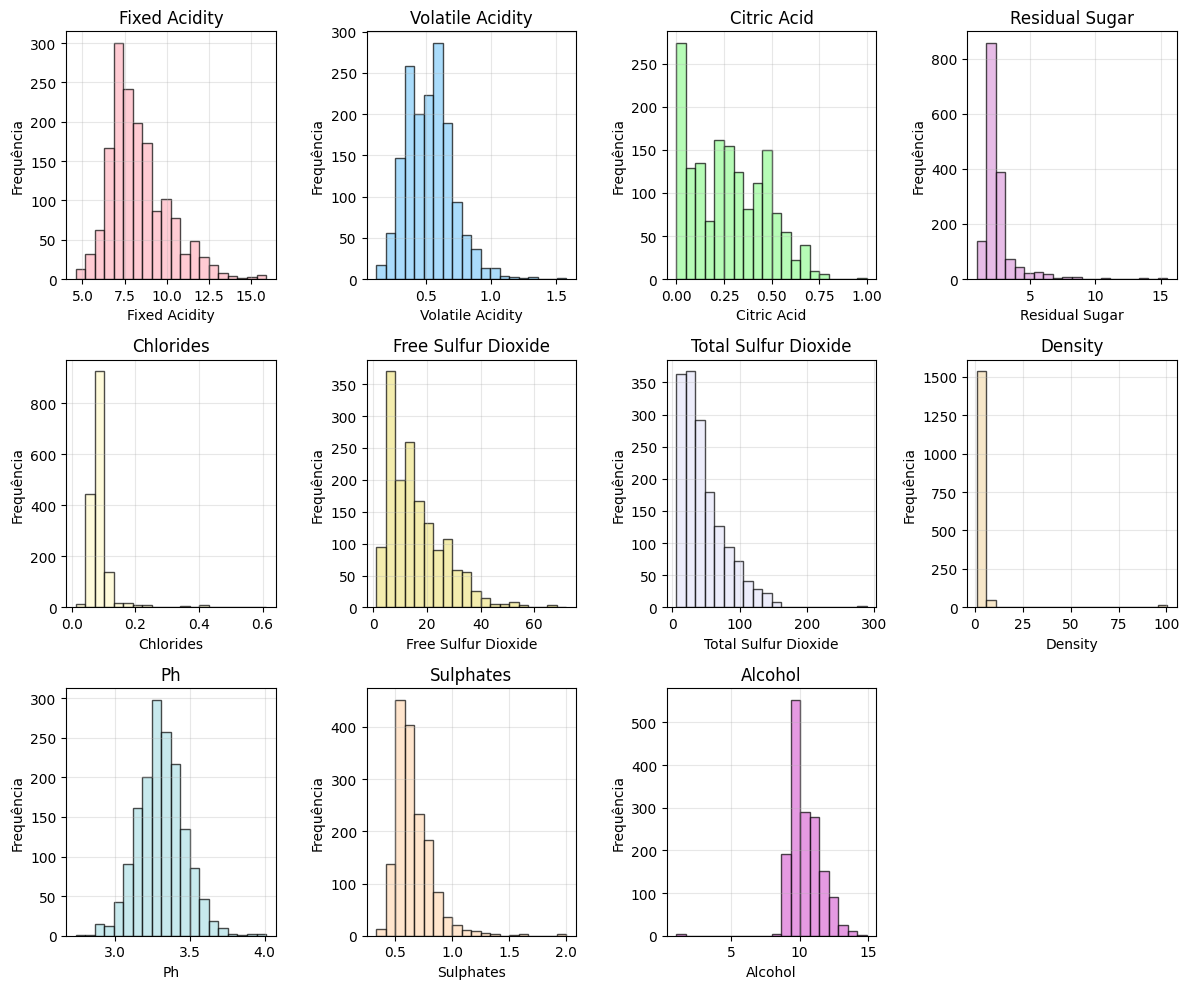

In [ ]:
univariate_statistics_histogram_frequency(dt_whine_red)

3.2. Calculando os valores da Média, Desvio Padrão e Assimetria de cada preditor

In [ ]:
def univariate_statistics_values(dataset):
    values = []
    predictors_columns = dataset.columns[:11]

    for column in predictors_columns:
        mean = dataset[column].mean() # Média
        std_dev = dataset[column].std() # Desvio padrão
        skewness = dataset[column].skew() # Assimetria

        values.append({
            "Preditor": column,
            "Média (µ)": round(mean, 4),
            "Desvio Padrão (σ)": round(std_dev, 4),
            "Assimetria (γ)": round(skewness, 4)
        })

    results = pd.DataFrame(values)
    return results

table_statistics_red = univariate_statistics_values(dt_whine_red)


In [ ]:
# VALORES ESTATÍSTICOS DOS VINHOS TINTO
print(table_statistics_red.to_string(index=False))

            Preditor  Média (µ)  Desvio Padrão (σ)  Assimetria (γ)
       fixed acidity     8.3196             1.7411          0.9828
    volatile acidity     0.5278             0.1791          0.6716
         citric acid     0.2710             0.1948          0.3183
      residual sugar     2.5388             1.4099          4.5407
           chlorides     0.0875             0.0471          5.6803
 free sulfur dioxide    15.8749            10.4602          1.2506
total sulfur dioxide    46.4678            32.8953          1.5155
             density     2.2087             9.6641          9.8039
                  pH     3.3111             0.1544          0.1937
           sulphates     0.6581             0.1695          2.4287
             alcohol    10.3978             1.1599         -0.5768


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import mode

def plot_distribution_style_image(dataset):
    predictors_columns = dataset.columns[:11]
    num_vars = len(predictors_columns)

    # Define layout de subplots
    cols = 3
    rows = int(np.ceil(num_vars / cols))
    fig, axs = plt.subplots(rows, cols, figsize=(cols * 3, rows * 2))
    axs = axs.flatten()

    for i, column in enumerate(predictors_columns):
        data = dataset[column].dropna()

        mean_val = data.mean()
        median_val = data.median()
        mode_result = mode(data, keepdims=True)
        mode_val = mode_result.mode[0] if mode_result.count[0] > 0 else None

        sns.kdeplot(data, ax=axs[i], color='black', linewidth=2)

        if mode_val is not None:
            axs[i].axvline(mode_val, color='blue', linestyle=':', linewidth=2, label='Moda')
        axs[i].axvline(median_val, color='green', linestyle='-', linewidth=2, label='Mediana')
        axs[i].axvline(mean_val, color='red', linestyle='--', linewidth=2, label='Média')

        axs[i].set_title(f"{column.title()}", fontsize=12)
        axs[i].set_yticks([])
        axs[i].set_xticks([])
        axs[i].set_ylabel("")
        axs[i].set_xlabel("")
        axs[i].spines['top'].set_visible(False)
        axs[i].spines['right'].set_visible(False)
        axs[i].spines['left'].set_visible(False)
        axs[i].spines['bottom'].set_visible(False)
        axs[i].legend(fontsize=8, loc='upper right')

    for j in range(num_vars, len(axs)):
        axs[j].set_visible(False)

    plt.tight_layout()
    plt.show()


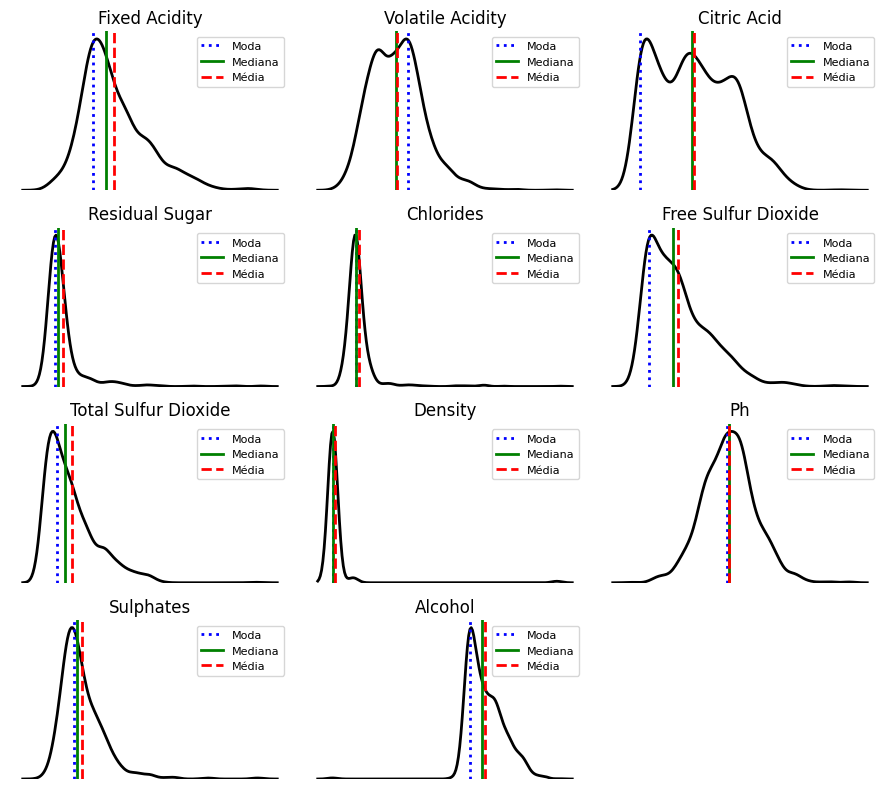

In [ ]:
plot_distribution_style_image(dt_whine_red)


#4. Análise univariada condicional por classe

4.1 Definindo as classes pelo preditor de qualidade.

In [ ]:
dt_whine_red['quality'].value_counts().sort_index()

,count
quality,
3,10
4,53
5,681
6,638
7,199
8,18


As classe são:
*   0 até 4 - Ruim
*   5       - Regular
*   6       - Médio
*   7       - Bom
*   8 até 10 - Excelente



In [ ]:

def categorizar_qualidade(valor):
  if valor <= 4:return 'Ruim'
  elif valor <= 5: return 'Regular'
  elif valor <= 6: return 'Médio'
  elif valor <= 7: return 'Bom'
  else: return 'Excelente'

def class_conditional_univariate_analysis(dataset, class_column='classe_qualitativa'):

    unidades = {
        'fixed acidity': '(g/L)',
        'volatile acidity': '(g/L)',
        'citric acid': '(g/L)',
        'residual sugar': '(g/L)',
        'chlorides': '',
        'free sulfur dioxide': '(mg/L)',
        'total sulfur dioxide': '(mg/L)',
        'density': '',
        'pH': '',
        'sulphates': '(g/L)',
        'alcohol': '(% vol)'
    }

    predictors_columns = [c for c in dataset.columns if c not in [class_column, 'quality']]
    classes = ['Ruim', 'Regular', 'Médio', 'Bom', 'Excelente']

    cores_classes = {
        'Ruim': '#FF6347',       # vermelho
        'Regular': '#FFA500',    # laranja
        'Médio': '#FFD700',      # amarelo
        'Bom': '#90EE90',        # verde claro
        'Excelente': '#32CD32'   # verde escuro
    }

    resultados = []
    for column in predictors_columns:
        for c in classes:
            class_data = dataset[dataset[class_column] == c][column].dropna()
            if len(class_data) > 0:
                media = np.mean(class_data)
                desvio = np.std(class_data)
                assimetria = skew(class_data)
                resultados.append({
                    'Variável': column,
                    'Classe': c,
                    'Média': round(media, 4),
                    'Desvio Padrão': round(desvio, 4),
                    'Assimetria': round(assimetria, 4)
                })

    df_resultados = pd.DataFrame(resultados)

    print("\nEstatísticas Class-Condicionais por Preditor:\n")

    for i, column in enumerate(predictors_columns):
      unidade = unidades.get(column, '')
      nome_completo = f"{column} {unidade}".strip()

      print(f"\n{nome_completo}")

      plt.figure(figsize=(6, 6))
      for c in classes:
          class_data = dataset[dataset[class_column] == c][column]
          plt.hist(
              class_data,
              bins=20,
              histtype='step',
              linewidth=2,
              label=c,
              color=cores_classes[c],
              alpha=0.9
          )
      plt.xlabel(nome_completo, fontsize=16)
      plt.ylabel('Frequência', fontsize=16)
      plt.grid(alpha=0.3)
      plt.xticks(fontsize=12)
      plt.yticks(fontsize=12)

      # Ajuste da legenda
      if i == len(predictors_columns) - 1:
          # último gráfico → legenda à esquerda
          plt.legend(title='Classe', fontsize=12, title_fontsize=12, loc='upper left', frameon=True)
      else:
          plt.legend(title='Classe', fontsize=12, title_fontsize=12, loc='upper right', frameon=True)

      plt.show()

      df_var = df_resultados[df_resultados['Variável'] == column][['Classe', 'Média', 'Desvio Padrão', 'Assimetria']]
      print(tabulate(df_var, headers='keys', tablefmt='fancy_grid', showindex=False))
      print("\n")

    return df_resultados



Estatísticas Class-Condicionais por Preditor:


fixed acidity (g/L)


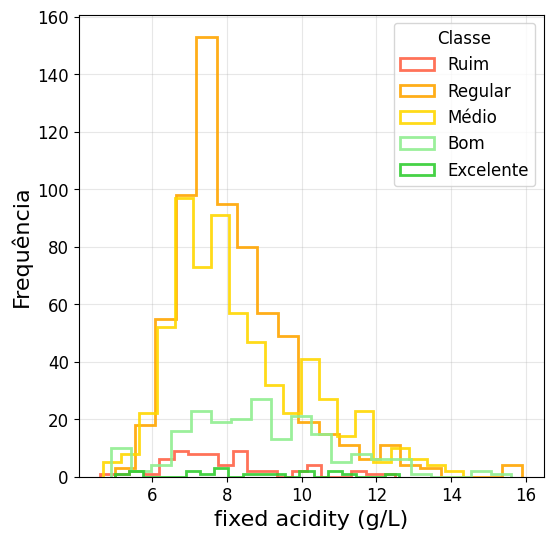

╒═══════════╤═════════╤═════════════════╤══════════════╕
│ Classe    │   Média │   Desvio Padrão │   Assimetria │
╞═══════════╪═════════╪═════════════════╪══════════════╡
│ Ruim      │  7.8714 │          1.6361 │       0.8725 │
├───────────┼─────────┼─────────────────┼──────────────┤
│ Regular   │  8.1673 │          1.5628 │       1.3799 │
├───────────┼─────────┼─────────────────┼──────────────┤
│ Médio     │  8.3472 │          1.7964 │       0.8321 │
├───────────┼─────────┼─────────────────┼──────────────┤
│ Bom       │  8.8724 │          1.9875 │       0.5105 │
├───────────┼─────────┼─────────────────┼──────────────┤
│ Excelente │  8.5667 │          2.0599 │       0.0399 │
╘═══════════╧═════════╧═════════════════╧══════════════╛



volatile acidity (g/L)


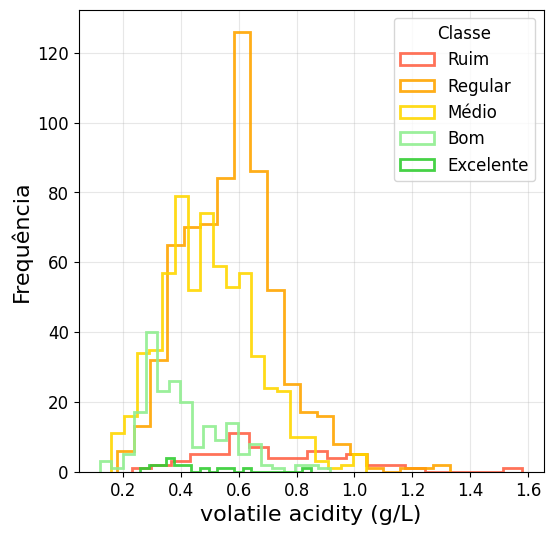

╒═══════════╤═════════╤═════════════════╤══════════════╕
│ Classe    │   Média │   Desvio Padrão │   Assimetria │
╞═══════════╪═════════╪═════════════════╪══════════════╡
│ Ruim      │  0.7242 │          0.246  │       0.6377 │
├───────────┼─────────┼─────────────────┼──────────────┤
│ Regular   │  0.577  │          0.1647 │       0.5924 │
├───────────┼─────────┼─────────────────┼──────────────┤
│ Médio     │  0.4975 │          0.1608 │       0.4338 │
├───────────┼─────────┼─────────────────┼──────────────┤
│ Bom       │  0.4039 │          0.1449 │       0.95   │
├───────────┼─────────┼─────────────────┼──────────────┤
│ Excelente │  0.4233 │          0.1408 │       1.5749 │
╘═══════════╧═════════╧═════════════════╧══════════════╛



citric acid (g/L)


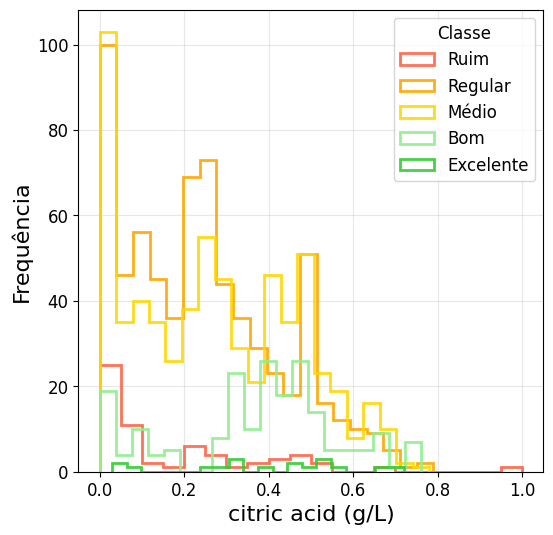

╒═══════════╤═════════╤═════════════════╤══════════════╕
│ Classe    │   Média │   Desvio Padrão │   Assimetria │
╞═══════════╪═════════╪═════════════════╪══════════════╡
│ Ruim      │  0.1737 │          0.2058 │       1.5226 │
├───────────┼─────────┼─────────────────┼──────────────┤
│ Regular   │  0.2437 │          0.1799 │       0.5234 │
├───────────┼─────────┼─────────────────┼──────────────┤
│ Médio     │  0.2738 │          0.195  │       0.2219 │
├───────────┼─────────┼─────────────────┼──────────────┤
│ Bom       │  0.3752 │          0.1939 │      -0.3784 │
├───────────┼─────────┼─────────────────┼──────────────┤
│ Excelente │  0.3911 │          0.1939 │      -0.3552 │
╘═══════════╧═════════╧═════════════════╧══════════════╛



residual sugar (g/L)


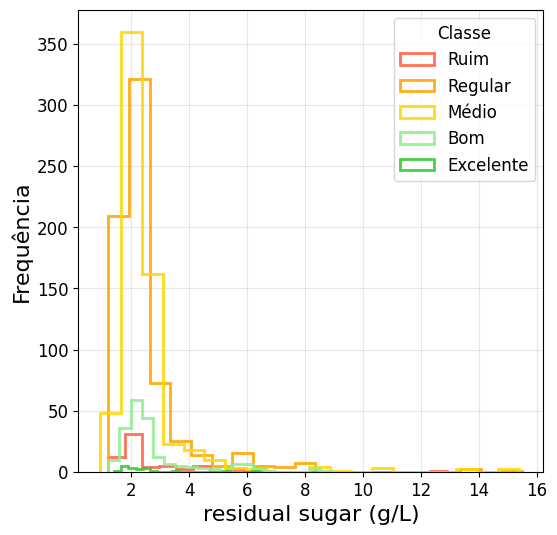

╒═══════════╤═════════╤═════════════════╤══════════════╕
│ Classe    │   Média │   Desvio Padrão │   Assimetria │
╞═══════════╪═════════╪═════════════════╪══════════════╡
│ Ruim      │  2.6849 │          1.71   │       3.6964 │
├───────────┼─────────┼─────────────────┼──────────────┤
│ Regular   │  2.5289 │          1.3588 │       4.3918 │
├───────────┼─────────┼─────────────────┼──────────────┤
│ Médio     │  2.4772 │          1.4404 │       5.4782 │
├───────────┼─────────┼─────────────────┼──────────────┤
│ Bom       │  2.7206 │          1.3681 │       2.2026 │
├───────────┼─────────┼─────────────────┼──────────────┤
│ Excelente │  2.5778 │          1.2586 │       1.9504 │
╘═══════════╧═════════╧═════════════════╧══════════════╛



chlorides


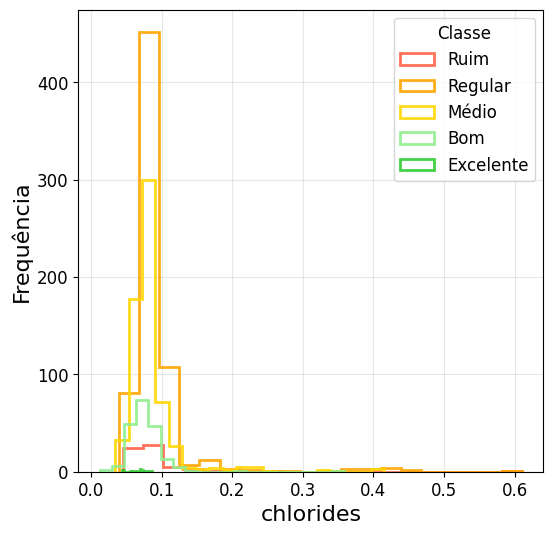

╒═══════════╤═════════╤═════════════════╤══════════════╕
│ Classe    │   Média │   Desvio Padrão │   Assimetria │
╞═══════════╪═════════╪═════════════════╪══════════════╡
│ Ruim      │  0.0957 │          0.0745 │       5.4427 │
├───────────┼─────────┼─────────────────┼──────────────┤
│ Regular   │  0.0927 │          0.0537 │       5.3291 │
├───────────┼─────────┼─────────────────┼──────────────┤
│ Médio     │  0.085  │          0.0395 │       4.8496 │
├───────────┼─────────┼─────────────────┼──────────────┤
│ Bom       │  0.0766 │          0.0294 │       4.9477 │
├───────────┼─────────┼─────────────────┼──────────────┤
│ Excelente │  0.0684 │          0.0113 │      -0.7145 │
╘═══════════╧═════════╧═════════════════╧══════════════╛



free sulfur dioxide (mg/L)


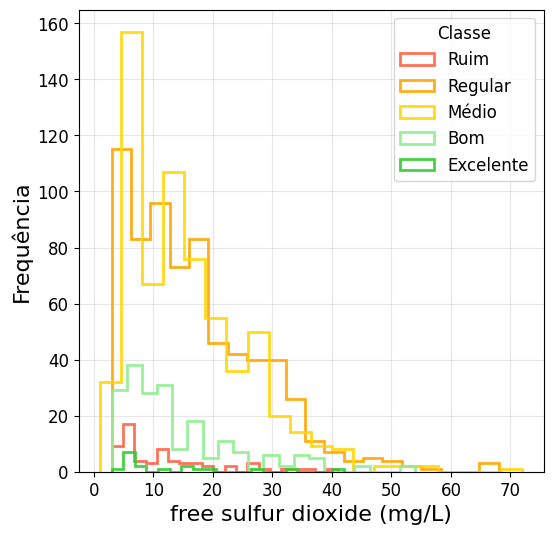

╒═══════════╤═════════╤═════════════════╤══════════════╕
│ Classe    │   Média │   Desvio Padrão │   Assimetria │
╞═══════════╪═════════╪═════════════════╪══════════════╡
│ Ruim      │ 12.0635 │          9.0042 │       1.3455 │
├───────────┼─────────┼─────────────────┼──────────────┤
│ Regular   │ 16.9838 │         10.9474 │       1.1984 │
├───────────┼─────────┼─────────────────┼──────────────┤
│ Médio     │ 15.7116 │          9.9331 │       1.2205 │
├───────────┼─────────┼─────────────────┼──────────────┤
│ Bom       │ 14.0452 │         10.1497 │       1.4805 │
├───────────┼─────────┼─────────────────┼──────────────┤
│ Excelente │ 13.2778 │         10.8413 │       1.365  │
╘═══════════╧═════════╧═════════════════╧══════════════╛



total sulfur dioxide (mg/L)


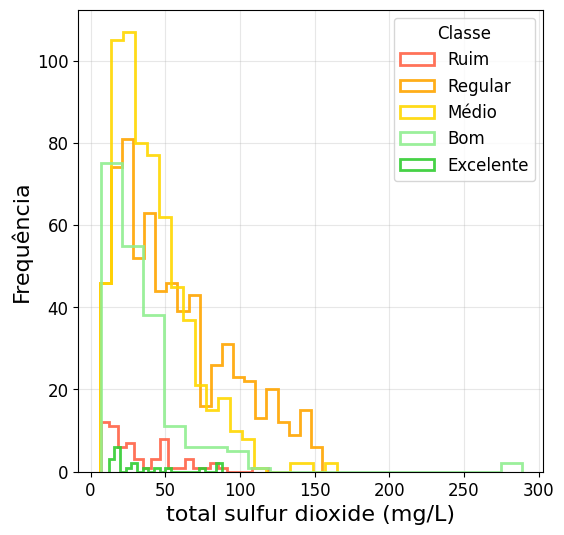

╒═══════════╤═════════╤═════════════════╤══════════════╕
│ Classe    │   Média │   Desvio Padrão │   Assimetria │
╞═══════════╪═════════╪═════════════════╪══════════════╡
│ Ruim      │ 34.4444 │         26.1848 │       1.2593 │
├───────────┼─────────┼─────────────────┼──────────────┤
│ Regular   │ 56.514  │         36.9659 │       0.7557 │
├───────────┼─────────┼─────────────────┼──────────────┤
│ Médio     │ 40.8699 │         25.0186 │       1.3445 │
├───────────┼─────────┼─────────────────┼──────────────┤
│ Bom       │ 35.0201 │         33.1077 │       4.5589 │
├───────────┼─────────┼─────────────────┼──────────────┤
│ Excelente │ 33.4444 │         24.7167 │       1.2252 │
╘═══════════╧═════════╧═════════════════╧══════════════╛



density


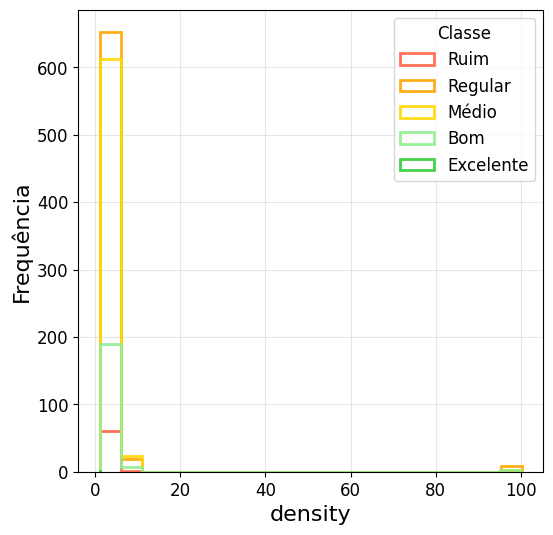

╒═══════════╤═════════╤═════════════════╤══════════════╕
│ Classe    │   Média │   Desvio Padrão │   Assimetria │
╞═══════════╪═════════╪═════════════════╪══════════════╡
│ Ruim      │  2.7115 │         12.41   │       7.6542 │
├───────────┼─────────┼─────────────────┼──────────────┤
│ Regular   │  2.5593 │         11.3963 │       8.3164 │
├───────────┼─────────┼─────────────────┼──────────────┤
│ Médio     │  1.788  │          6.9731 │      13.2959 │
├───────────┼─────────┼─────────────────┼──────────────┤
│ Bom       │  2.3082 │          9.983  │       9.4338 │
├───────────┼─────────┼─────────────────┼──────────────┤
│ Excelente │  0.9952 │          0.0023 │      -0.2186 │
╘═══════════╧═════════╧═════════════════╧══════════════╛



pH


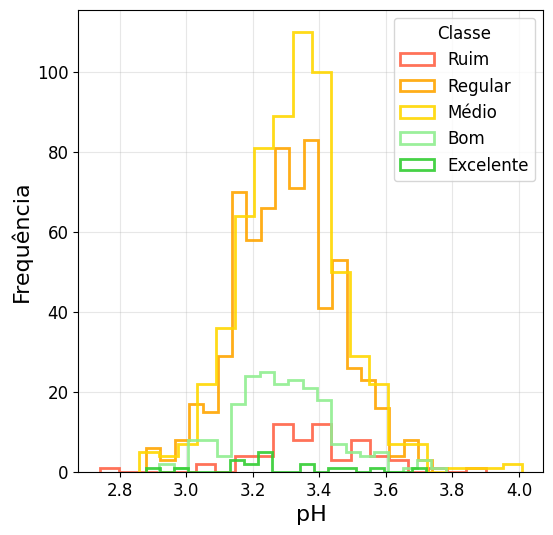

╒═══════════╤═════════╤═════════════════╤══════════════╕
│ Classe    │   Média │   Desvio Padrão │   Assimetria │
╞═══════════╪═════════╪═════════════════╪══════════════╡
│ Ruim      │  3.3841 │          0.1737 │      -0.2989 │
├───────────┼─────────┼─────────────────┼──────────────┤
│ Regular   │  3.3049 │          0.1505 │       0.0532 │
├───────────┼─────────┼─────────────────┼──────────────┤
│ Médio     │  3.3181 │          0.1539 │       0.3021 │
├───────────┼─────────┼─────────────────┼──────────────┤
│ Bom       │  3.2908 │          0.1497 │       0.38   │
├───────────┼─────────┼─────────────────┼──────────────┤
│ Excelente │  3.2672 │          0.195  │       0.3857 │
╘═══════════╧═════════╧═════════════════╧══════════════╛



sulphates (g/L)


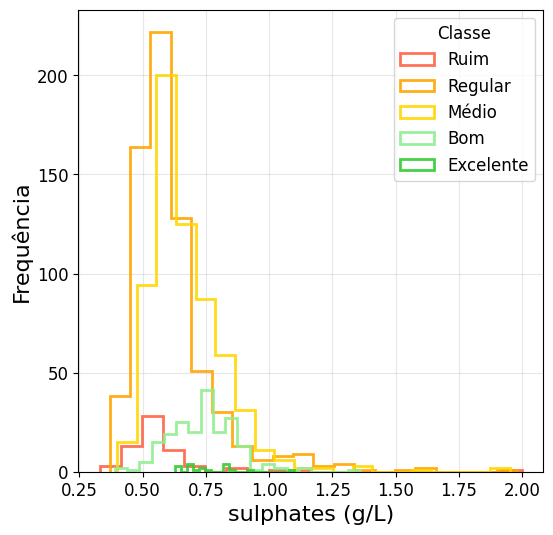

╒═══════════╤═════════╤═════════════════╤══════════════╕
│ Classe    │   Média │   Desvio Padrão │   Assimetria │
╞═══════════╪═════════╪═════════════════╪══════════════╡
│ Ruim      │  0.5922 │          0.2225 │       4.3602 │
├───────────┼─────────┼─────────────────┼──────────────┤
│ Regular   │  0.621  │          0.1709 │       2.8129 │
├───────────┼─────────┼─────────────────┼──────────────┤
│ Médio     │  0.6753 │          0.1585 │       2.7113 │
├───────────┼─────────┼─────────────────┼──────────────┤
│ Bom       │  0.7413 │          0.1353 │       0.6045 │
├───────────┼─────────┼─────────────────┼──────────────┤
│ Excelente │  0.7678 │          0.1121 │       1.3316 │
╘═══════════╧═════════╧═════════════════╧══════════════╛



alcohol (% vol)


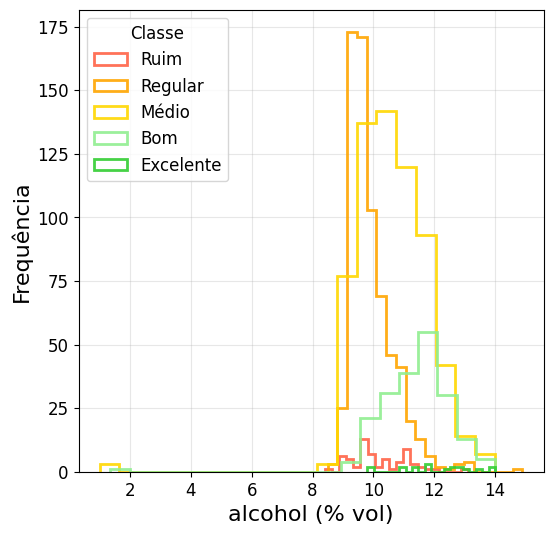

╒═══════════╤═════════╤═════════════════╤══════════════╕
│ Classe    │   Média │   Desvio Padrão │   Assimetria │
╞═══════════╪═════════╪═════════════════╪══════════════╡
│ Ruim      │ 10.2159 │          0.9109 │       0.549  │
├───────────┼─────────┼─────────────────┼──────────────┤
│ Regular   │  9.8997 │          0.736  │       1.8345 │
├───────────┼─────────┼─────────────────┼──────────────┤
│ Médio     │ 10.5856 │          1.2368 │      -1.7567 │
├───────────┼─────────┼─────────────────┼──────────────┤
│ Bom       │ 11.4045 │          1.187  │      -2.9775 │
├───────────┼─────────┼─────────────────┼──────────────┤
│ Excelente │ 12.0944 │          1.1895 │      -0.2146 │
╘═══════════╧═════════╧═════════════════╧══════════════╛




In [ ]:
dt_whine_red['classe_qualitativa'] = dt_whine_red['quality'].apply(categorizar_qualidade)

tabela_estatisticas = class_conditional_univariate_analysis(dt_whine_red, class_column='classe_qualitativa')

# 5. Análise Bivariada Incondicional

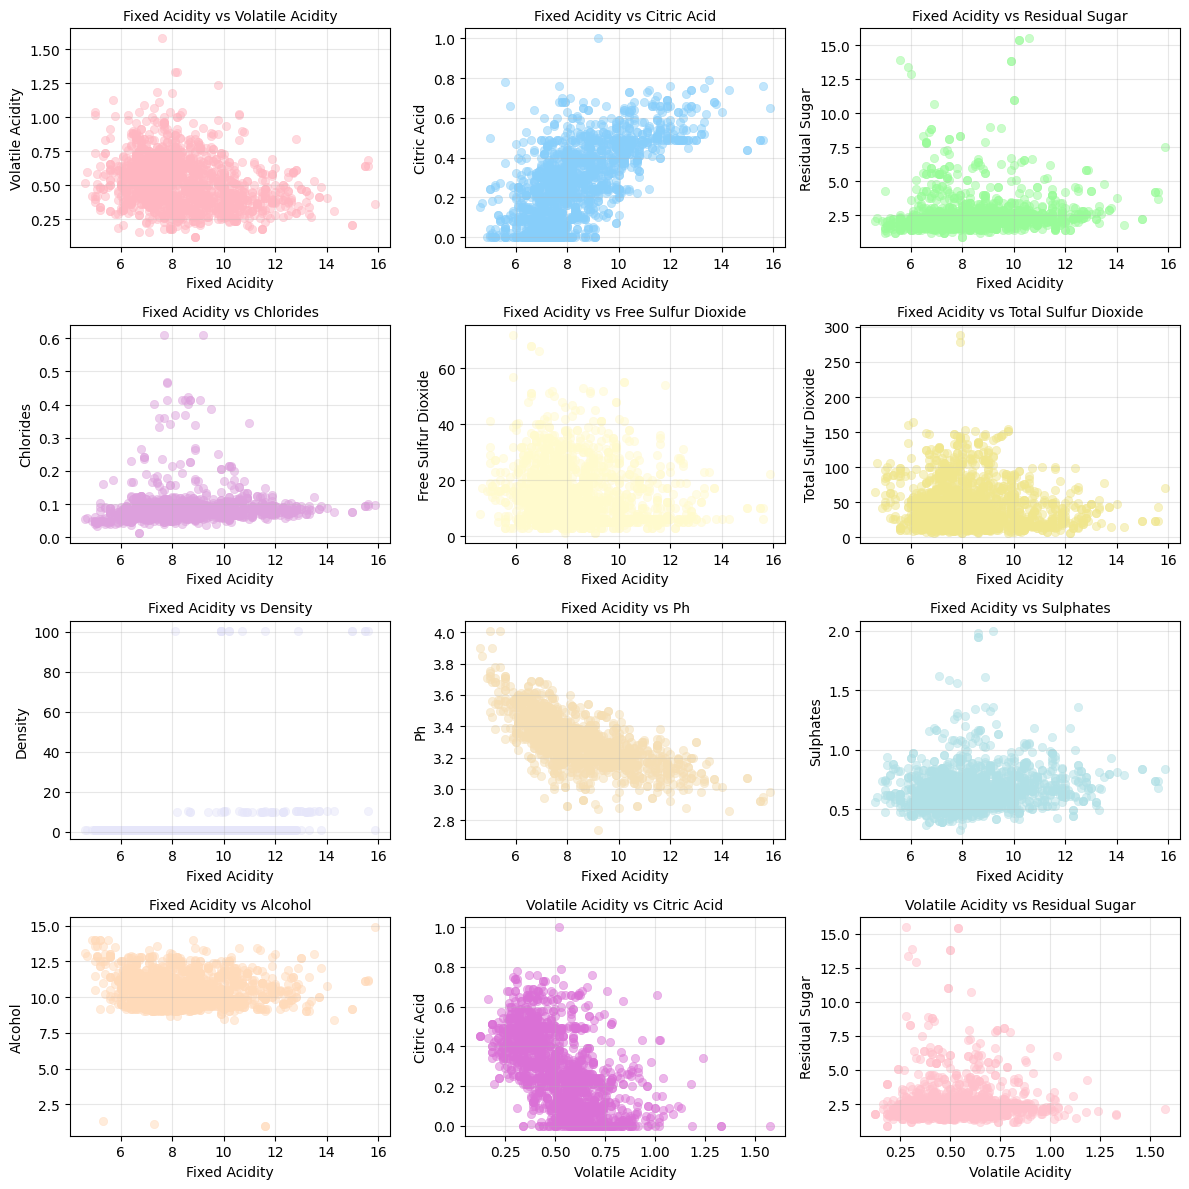

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def bivariate_statistics_scatter(dataset):
    predictors_columns = dataset.columns[:11]  # seleciona os 11 preditores numéricos
    num_pairs = len(predictors_columns)

    # Gera pares de variáveis (só combinações únicas)
    pairs = [(predictors_columns[i], predictors_columns[j])
             for i in range(num_pairs) for j in range(i + 1, num_pairs)]

    # Seleciona até 12 pares para visualizar (para não ficar enorme)
    pairs = pairs[:12]

    fig, axs = plt.subplots(4, 3, figsize=(12, 12))
    axs = axs.flatten()

    colors = ['#FFB6C1', '#87CEFA', '#98FB98', '#DDA0DD', '#FFFACD',
              '#F0E68C', '#E6E6FA', '#F5DEB3', '#B0E0E6', '#FFDAB9', '#DA70D6', '#FFC0CB', '#B0C4DE']

    for i, (x, y) in enumerate(pairs):
        sns.scatterplot(data=dataset, x=x, y=y, alpha=0.5, color=colors[i], edgecolor=None, ax=axs[i])
        axs[i].set_title(f"{x.title()} vs {y.title()}", fontsize=10)
        axs[i].set_xlabel(x.title())
        axs[i].set_ylabel(y.title())
        axs[i].grid(True, alpha=0.3)

    for i in range(len(pairs), len(axs)):
        axs[i].set_visible(False)

    plt.tight_layout()
    plt.show()

# Exemplo de uso:
bivariate_statistics_scatter(dt_whine_red)

In [ ]:
corr_matrix = dt_whine_red.iloc[:, :11].corr().round(2)
corr_matrix

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.00,-0.26,0.67,0.11,0.09,-0.15,-0.11,0.26,-0.68,0.18,-0.06
volatile acidity,-0.26,1.00,-0.55,0.00,0.06,-0.01,0.08,0.00,0.23,-0.26,-0.19
citric acid,0.67,-0.55,1.00,0.14,0.20,-0.06,0.04,0.09,-0.54,0.31,0.11
residual sugar,0.11,0.00,0.14,1.00,0.06,0.19,0.20,0.30,-0.09,0.01,0.05
chlorides,0.09,0.06,0.20,0.06,1.00,0.01,0.05,0.07,-0.27,0.37,-0.20
free sulfur dioxide,-0.15,-0.01,-0.06,0.19,0.01,1.00,0.67,0.09,0.07,0.05,-0.06
total sulfur dioxide,-0.11,0.08,0.04,0.20,0.05,0.67,1.00,0.04,-0.07,0.04,-0.20
density,0.26,0.00,0.09,0.30,0.07,0.09,0.04,1.00,-0.12,0.05,-0.05
pH,-0.68,0.23,-0.54,-0.09,-0.27,0.07,-0.07,-0.12,1.00,-0.20,0.19
sulphates,0.18,-0.26,0.31,0.01,0.37,0.05,0.04,0.05,-0.20,1.00,0.08


# 6. Análise Multivariada Incondicional

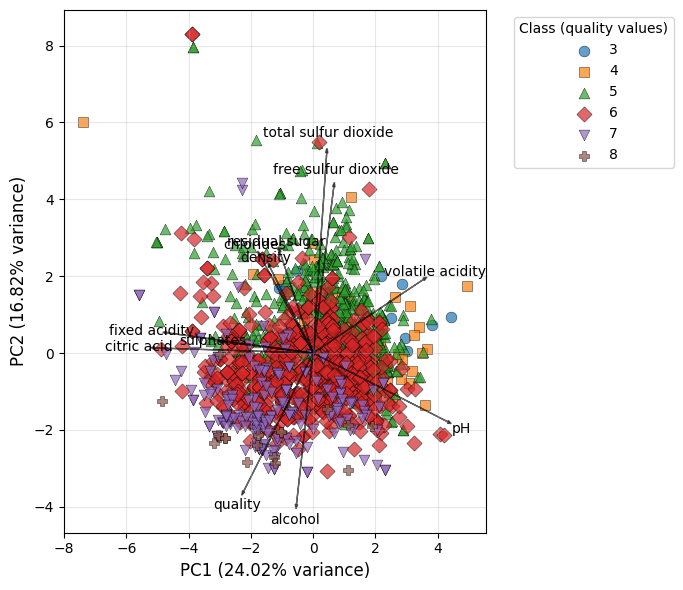

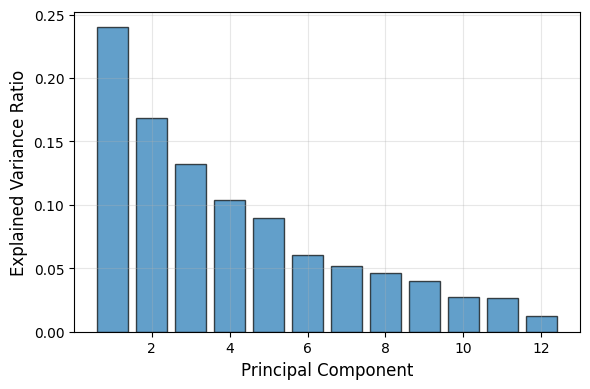

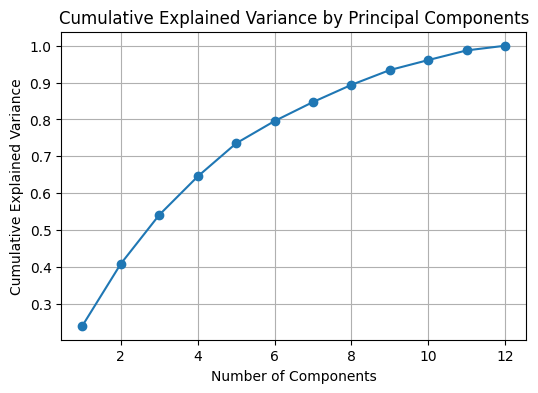

In [42]:
def manual_pca(X, n_components=2, standardize=True):
    if standardize:  # Assure all predictors contribute equally
        mean = np.mean(X, axis=0)
        std = np.std(X, axis=0, ddof=1)
        std_repl = std.copy()
        std_repl[std_repl == 0] = 1.0
        Xs = (X - mean) / std_repl
    else:
        mean = np.mean(X, axis=0)
        Xs = X - np.mean(X, axis=0)

    # Covariance matrix
    cov = np.cov(Xs, rowvar=False, ddof=1)
    # Eigen decomposition
    eigvals, eigvecs = np.linalg.eigh(cov)  # (eigh -> symmetric)
    # Sort eigenvalues in descending order
    idx = np.argsort(eigvals)[::-1]
    eigvals = eigvals[idx]
    eigvecs = eigvecs[:, idx]
    # Select top components
    components = eigvecs[:, :n_components]

    projected = Xs.dot(components)
    # Explained variance ratio
    explained_variance_ratio = eigvals / np.sum(eigvals)
    # Add cumulative explained variance
    cumulative_explained_variance = np.cumsum(explained_variance_ratio)
    return {
        "mean": mean,
        "std": std_repl if standardize else None,
        "components": components,
        "eigvals": eigvals,
        "explained_variance_ratio": explained_variance_ratio,
        "cumulative_explained_variance": cumulative_explained_variance,
        "projected": projected
    }

# Convert to string
labels = dt_whine_red['quality'].astype(str).values
X = dt_whine_red.select_dtypes(include=[np.number]).values

# Run PCA
result = manual_pca(X, n_components=2, standardize=True)
proj = result["projected"]
explained = result["explained_variance_ratio"]

# PCA scatter plot with loadings (variable influence arrows)
unique_labels, inv = np.unique(labels, return_inverse=True)
markers = ['o', 's', '^', 'D', 'v', 'P', 'X']
plt.figure(figsize=(7,6))

# Plot projected samples by class
for i, lab in enumerate(unique_labels):
    mask = (inv == i)
    plt.scatter(proj[mask,0], proj[mask,1],
                label=str(lab),
                marker=markers[i % len(markers)],
                edgecolor='k', linewidth=0.4, s=60, alpha=0.7)

# Axis labels and title
plt.xlabel("PC1 (%.2f%% variance)" % (explained[0]*100), fontsize=12)
plt.ylabel("PC2 (%.2f%% variance)" % (explained[1]*100), fontsize=12)

# Compute and plot variable loadings
features = dt_whine_red.select_dtypes(include=[np.number]).columns
loadings = result["components"][:, :2]
scaling_factor = 10  # Adjust arrow length visually

for i, feature in enumerate(features):
    plt.arrow(0, 0,
              loadings[i,0]*scaling_factor,
              loadings[i,1]*scaling_factor,
              color='black', alpha=0.6, head_width=0.08)
    plt.text(loadings[i,0]*scaling_factor*1.1,
             loadings[i,1]*scaling_factor*1.1,
             feature, fontsize=10, color='black', ha='center', va='center')

plt.legend(title="Class (quality values)", bbox_to_anchor=(1.05,1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Individual explained variance plot (scree plot)
plt.figure(figsize=(6,4))
plt.bar(range(1, len(result["explained_variance_ratio"]) + 1),
        result["explained_variance_ratio"], alpha=0.7, edgecolor='k')
plt.xlabel("Principal Component", fontsize=12)
plt.ylabel("Explained Variance Ratio", fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Cumulative explained variance plot
plt.figure(figsize=(6,4))
plt.plot(np.arange(1, len(result["cumulative_explained_variance"])+1),
         result["cumulative_explained_variance"], marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Cumulative Explained Variance by Principal Components")
plt.grid(True)
plt.show()
